## Data load

In [1]:
# Check data path 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Check data shape
import pandas as pd
# test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
# train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

test_df = pd.read_csv("./data/test.csv")
train_df = pd.read_csv("./data/train.csv")
print(f"Test data shape : {test_df.shape} \nTrain data shape : {train_df.shape}")


Test data shape : (3263, 4) 
Train data shape : (7613, 5)


In [3]:
# check train data head
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Check test data head
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Basic EDA

In [5]:
train_df.drop(columns=['id','keyword','location'], inplace=True)
test_df.drop(columns=['id', 'keyword', 'location'], inplace=True)

In [6]:
print(train_df.head())
print(test_df.head())

                                                text  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1
                                                text
0                 Just happened a terrible car crash
1  Heard about #earthquake is different cities, s...
2  there is a forest fire at spot pond, geese are...
3           Apocalypse lighting. #Spokane #wildfires
4      Typhoon Soudelor kills 28 in China and Taiwan


Text(0, 0.5, 'train samples')

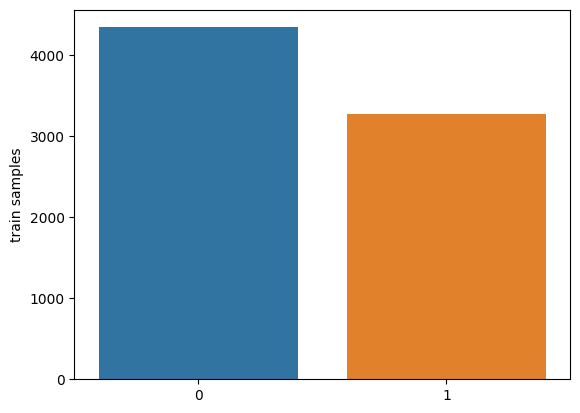

In [7]:
# Check class distribution
import seaborn as sns
import matplotlib.pyplot as plt

x = train_df.target.value_counts()
sns.barplot(x = x.index,y = x)
plt.gca().set_ylabel("train samples")

## Length of text

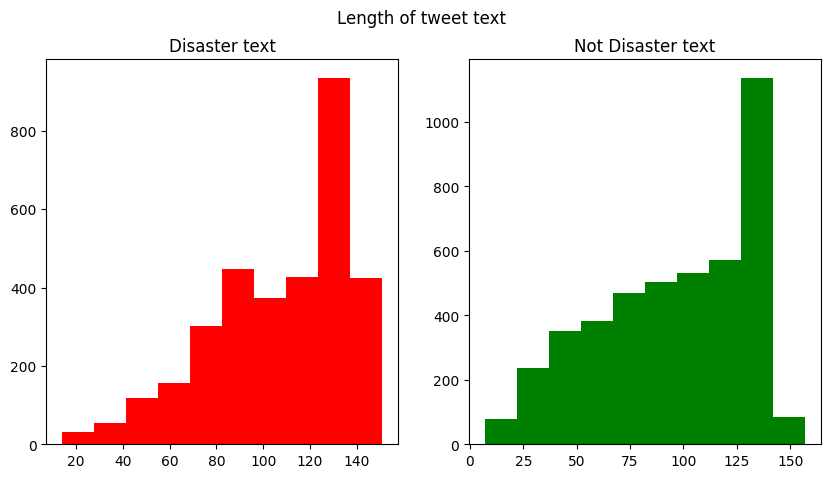

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
text_len = train_df[train_df['target']==1]['text'].str.len()
ax1.hist(text_len, color='red')
ax1.set_title('Disaster text')
text_len = train_df[train_df['target']==0]['text'].str.len()
ax2.hist(text_len, color='green')
ax2.set_title('Not Disaster text')
fig.suptitle('Length of tweet text')
plt.show()

## Length of Word

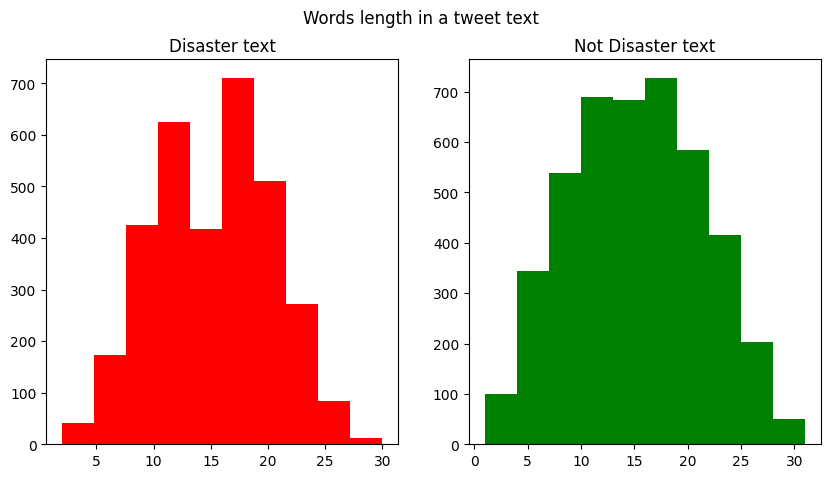

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
word_len = train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(word_len, color='red')
ax1.set_title('Disaster text')
word_len = train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(word_len, color='green')
ax2.set_title("Not Disaster text")
fig.suptitle('Words length in a tweet text')
plt.show()

## Analyzing punctuations

<BarContainer object of 18 artists>

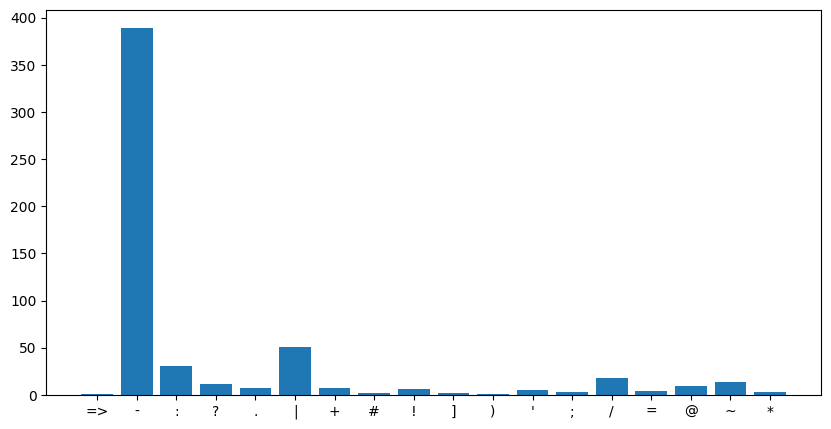

In [10]:
from collections import defaultdict

def create_corpus(target):
    corpus=[]
    
    for x in train_df[train_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


import string
plt.figure(figsize=(10, 5))
corpus = create_corpus(1)

dic = defaultdict(int)
special = string.punctuation
for i in corpus:
    if i in special:
        dic[i]+=1
        
x, y = zip(*dic.items())
plt.bar(x, y)

## Data Cleaning

In [11]:
import re

def remove_url(text: str) -> str:
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
    
def remove_html(text: str) -> str:
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_emoji(text: str) -> str:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text: str) -> str:
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [12]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
print(remove_url(example))

example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""
print(remove_html(example))

example = "Omg another Earthquake 😔😔"
print(remove_emoji(example))

New competition launched :

Real or Fake
Kaggle 
getting started

Omg another Earthquake 


## Normalize train data for creating vocab

In [13]:
train_df['text'] = train_df['text'].apply(lambda x: remove_url(x))
train_df['text'] = train_df['text'].apply(lambda x: remove_html(x))
train_df['text'] = train_df['text'].apply(lambda x: remove_emoji(x))
train_df['text'] = train_df['text'].apply(lambda x: remove_punct(x))
train_df.head


<bound method NDFrame.head of                                                    text  target
0     Our Deeds are the Reason of this earthquake Ma...       1
1                 Forest fire near La Ronge Sask Canada       1
2     All residents asked to shelter in place are be...       1
3     13000 people receive wildfires evacuation orde...       1
4     Just got sent this photo from Ruby Alaska as s...       1
...                                                 ...     ...
7608  Two giant cranes holding a bridge collapse int...       1
7609  ariaahrary TheTawniest The out of control wild...       1
7610              M194 0104 UTC5km S of Volcano Hawaii        1
7611  Police investigating after an ebike collided w...       1
7612  The Latest More Homes Razed by Northern Califo...       1

[7613 rows x 2 columns]>

## Create Vocab

In [14]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

torch_tokenizer = get_tokenizer('basic_english')
tweet_vocab = build_vocab_from_iterator(map(torch_tokenizer, train_df['text']), min_freq=2, specials=['<unk>'])
tweet_vocab.set_default_index(tweet_vocab['<unk>'])

## Create Dataset 

In [17]:
import torch
from torch.utils.data import Dataset
from torchtext.vocab import Vocab

import re
        

class TweetTrainDataset(Dataset):

    def __init__(self, vocab: Vocab, data_dir: str):
        self.vocab = vocab
        self.data_dir = data_dir
        self.load_data()
        self.tokenizer = get_tokenizer('basic_english')
        
        
    def __len__(self):
        return len(self.text)

    def __getitem__(self, idx):
        x = self.vocab(self.tokenizer(self.text[idx]))
        x = torch.tensor(x)
        y = self.label[idx]
        return x, y

    def load_data(self):
        tmp_df = pd.read_csv(self.data_dir)
        self.text = tmp_df['text'].apply(lambda x: self.preprocess(x))
        self.label = torch.LongTensor(tmp_df['target'])
    
    def preprocess(self, text: str) -> str:
        url = re.compile(r'https?://\S+|www\.\S+')
        html = re.compile(r'<.*?>')
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        table = str.maketrans('', '', string.punctuation)
    
        text = url.sub(r'', text)
        text = html.sub(r'', text)
        text = emoji_pattern.sub(r'', text)
        text = text.translate(table)
        return text


class TweetTestDataset(TweetTrainDataset):

    def __init__(self, vocab: Vocab, data_dir: str):
        super().__init__(vocab, data_dir)

    def __getitem__(self, idx):
        x = self.vocab(self.tokenizer(self.text[idx]))
        x = torch.tensor(x)
        return x

    def load_data(self):
        tmp_df = pd.read_csv(self.data_dir)
        self.text = tmp_df['text'].apply(lambda x: self.preprocess(x))

## Create pytorch lightning data module

In [18]:
from pytorch_lightning import LightningDataModule
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from torch.nn.utils.rnn import pad_sequence


class TweetDataModule(LightningDataModule):

    def __init__(
        self,
        train_data_dir: str,
        test_data_dir: str,
        vocab: Vocab,
        train_ratio: float,
        batch_size: int,
        num_workers: int
    ):
        super().__init__()
        self.train_data_dir = train_data_dir
        self.test_data_dir = test_data_dir
        self.vocab = vocab
        self.train_ratio = train_ratio
        self.batch_size = batch_size
        self.num_workers = num_workers

    def setup(self, stage=None):
        self.train_dataset = TweetTrainDataset(
            self.vocab,
            self.train_data_dir,
        )

        self.test_dataset = TweetTestDataset(
            self.vocab,
            self.test_data_dir,
        )

        train_cnt = int(len(self.train_dataset) * self.train_ratio)
        valid_cnt = len(self.train_dataset) - train_cnt

        self.train_dataset, self.valid_dataset = random_split(
            self.train_dataset,
            [train_cnt, valid_cnt]
        )

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=self.num_workers,
            collate_fn=self.make_train_batch,
        )

    def val_dataloader(self):
        return DataLoader(
            self.valid_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers,
            collate_fn=self.make_train_batch,
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers,
            collate_fn=self.make_test_batch
        )
    
    def make_train_batch(self, samples):
        inputs = [sample[0] for sample in samples]
        labels = [sample[1] for sample in samples]
        padded_inputs = pad_sequence(inputs, batch_first=True)
        return padded_inputs.contiguous(), torch.stack(labels).contiguous()

    def make_test_batch(self, samples):
        inputs = [sample for sample in samples]
        padded_inputs = pad_sequence(inputs, batch_first=True)
        return padded_inputs.contiguous()


## Pytorch lightning model

In [20]:
from typing import Tuple

import torch.nn as nn
import pytorch_lightning as pl

from torchmetrics import Accuracy


class RNNClassifier(pl.LightningModule):
    
    def __init__(
        self,
        input_size: int,
        word_vec_size: int,
        hidden_size: int,
        n_classes: int = 2,
        n_layers: int = 4,
        dropout_p: float = .4,       
    ):
        super().__init__()
        self.save_hyperparameters()
        self.input_size = input_size
        self.word_vec_size = word_vec_size
        self.hidden_size = hidden_size
        self.n_classes = n_classes
        self.n_layers = n_layers
        self.dropout_p = dropout_p
        self.crit = nn.NLLLoss()
    
        self.train_acc = Accuracy(task="multiclass", num_classes=2, average='macro', top_k=1)
        self.valid_acc = Accuracy(task="multiclass", num_classes=2, average='macro', top_k=1)
        
        self.emb = nn.Embedding(input_size, word_vec_size)
        self.rnn = nn.LSTM(
            input_size = word_vec_size,
            hidden_size =  hidden_size,
            num_layers = n_layers,
            dropout = dropout_p,
            batch_first = True,
            bidirectional = True,
        )
        self.generator = nn.Linear(hidden_size*2, n_classes)
        self.activation = nn.LogSoftmax(dim=-1)
        
    def forward(self, x: torch.Tensor):
        # |x| = (batch_size, length)
        x = self.emb(x)
        # |x| = (batch_size, length, word_vec_size)
        x, _ = self.rnn(x)
        # |x| = (batch_size, length, hidden_size * 2)
        y = self.activation(self.generator(x[:, -1]))
        # |y| = (batch_size, n_classes)
        return y
    
    def training_step(self, batch: Tuple, batch_idx: int):
        x, y = batch
        y_hat = self(x)
        loss = self.crit(y_hat, y.squeeze())
        y_hat = torch.argmax(y_hat, dim=-1)
        self.train_acc(y_hat, y)
        self.log("train_loss", loss)
        return {"loss": loss}
    
    def training_epoch_end(self, outputs):
        avg_loss = torch.stack([x["loss"] for x in outputs]).mean()
        train_acc = self.train_acc.compute()
        self.log("train_accuracy", train_acc)
        self.log("train_epoch_loss", avg_loss)
        return
    
    def validation_step(self, batch: Tuple, batch_idx: int):
        x, y = batch
        y_hat = self(x)
        loss = self.crit(y_hat, y.squeeze())
        y_hat = torch.argmax(y_hat, dim=-1)
        self.valid_acc(y_hat, y)
        return {"val_loss": loss}
    
    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x["val_loss"] for x in outputs]).mean()
        
        valid_acc = self.valid_acc.compute()
        self.log("valid_accuracy", valid_acc)
        self.log("valid_epoch_loss", avg_loss)
        self.log("epoch", self.current_epoch)
        
    def test_step(self, batch, batch_idx):
        x = batch
        y_hat = torch.argmax(self(x), dim=-1)
        return y_hat
    
    def test_epoch_end(self, outputs):
        y_hat = torch.cat(outputs, dim=0)
        y_hat = y_hat.detach().cpu().numpy()
        
        test_df = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
        test_df["target"] = y_hat
        test_df.to_csv("/kaggle/working/submission.csv", index=False) 
        
    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters())
        return optimizer

## Train model using pytorch lightning

In [21]:
# make data module

dm = TweetDataModule(
    train_data_dir="./data/train.csv",
    test_data_dir="./data/test.csv",
    vocab=tweet_vocab,
    train_ratio=.9,
    batch_size=16,
    num_workers=1,
)


## Set param

In [22]:
vocab_size = len(tweet_vocab)
save_top_k = 5
max_epochs = 50

# model param
word_vec_size = 256
hidden_size = 512
n_classes = 2

In [23]:
model = RNNClassifier(input_size = vocab_size, word_vec_size = word_vec_size, hidden_size=hidden_size, n_classes=n_classes)

In [26]:
from pytorch_lightning.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    dirpath = "./models",
    filename="rnn-{epoch:2d}-{valid_accuracy:.4f}",
    monitor="valid_accuracy",
    mode="max",
    save_top_k=save_top_k
)


In [27]:
trainer = pl.Trainer(max_epochs=max_epochs, accelerator='gpu', devices=1, callbacks=[model_checkpoint])
trainer.fit(model, datamodule=dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/leehyun22/kaggle-disaster-fastapi/.venv/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /home/leehyun22/kaggle-disaster-fastapi/models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5]

  | Name       | Type               | Params
--------------------------------------------------
0 | crit       | NLLLoss            | 0     
1 | train_acc  | MulticlassAccuracy | 0     
2 | valid_acc  | MulticlassAccuracy | 0     
3 | emb        | Embedding          | 1.7 M 
4 | rnn        | LSTM               | 22.1 M
5 | generator  | Linear             | 2.0 K 
6 | activation | LogSoftmax         | 0     
--------------------------------------------------
23.8 M    Trainable par

Sanity Checking: 0it [00:00, ?it/s]

/home/leehyun22/kaggle-disaster-fastapi/.venv/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/leehyun22/kaggle-disaster-fastapi/.venv/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [23]:
trainer.test(model, datamodule=dm)

Testing: 0it [00:00, ?it/s]

[{}]

### vocab script

In [16]:
import torch
script_vocab = torch.jit.script(tweet_vocab)

In [17]:
print(script_vocab.graph)

graph(%self : __torch__.torchtext.vocab.vocab.Vocab,
      %tokens.1 : str[]):
  %vocab : __torch__.torch.classes.torchtext.Vocab = prim::GetAttr[name="vocab"](%self)
  %5 : int[] = prim::CallMethod[name="lookup_indices"](%vocab, %tokens.1) # /home/leehyun22/kaggle-disaster-fastapi/.venv/lib/python3.8/site-packages/torchtext/vocab/vocab.py:35:15
  return (%5)



In [22]:
torch.jit.save(script_vocab, "vocab.pt")

In [23]:
vocab_script = torch.jit.load("vocab.pt", map_location='cpu')

In [24]:
vocab_script

RecursiveScriptModule(original_name=Vocab)